In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/tickets_train.csv")
print(df.head())

   ticket_id                                            text   category  \
0          1  Unable to login to account, urgent help needed    Account   
1          2             Billing discrepancy in last invoice    Billing   
2          3                  Website is loading very slowly  Technical   
3          4                      Password reset not working    Account   
4          5            Request for new feature in dashboard    Feature   

  priority  
0     High  
1   Medium  
2   Medium  
3     High  
4      Low  


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stopwords.words('english')]
    return ' '.join(tokens)

df["clean_text"] = df["text"].apply(preprocess)

[nltk_data] Downloading package punkt to C:\Users\Zohara
[nltk_data]     Begum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Zohara
[nltk_data]     Begum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Zohara
[nltk_data]     Begum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   # new requirement in recent NLTK versions
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Zohara
[nltk_data]     Begum\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Zohara
[nltk_data]     Begum\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to C:\Users\Zohara
[nltk_data]     Begum\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Zohara
[nltk_data]     Begum\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["category"], test_size=0.2, random_state=42)

model = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [6]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Account       0.00      0.00      0.00       0.0
     Billing       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklea

In [7]:
df = pd.read_csv("../data/tickets_train.csv")

In [8]:

print(df['category'].value_counts())  # check balance

category
Billing      11
Account      10
Technical    10
Feature       9
Name: count, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["category"], test_size=0.2, random_state=42, stratify=df["category"]
)

KeyError: 'clean_text'

In [10]:
def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stopwords.words('english')]
    return ' '.join(tokens)

df["clean_text"] = df["text"].apply(preprocess)
print(df.head())  # confirm clean_text exists

   ticket_id                                            text   category  \
0          1  Unable to login to account, urgent help needed    Account   
1          2             Billing discrepancy in last invoice    Billing   
2          3                  Website is loading very slowly  Technical   
3          4                      Password reset not working    Account   
4          5            Request for new feature in dashboard    Feature   

  priority                               clean_text  
0     High  unable login account urgent help needed  
1   Medium         billing discrepancy last invoice  
2   Medium                   website loading slowly  
3     High                   password reset working  
4      Low            request new feature dashboard  


In [11]:
def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stopwords.words('english')]
    return ' '.join(tokens)

df["clean_text"] = df["text"].apply(preprocess)
print(df.head())  # confirm clean_text exists

   ticket_id                                            text   category  \
0          1  Unable to login to account, urgent help needed    Account   
1          2             Billing discrepancy in last invoice    Billing   
2          3                  Website is loading very slowly  Technical   
3          4                      Password reset not working    Account   
4          5            Request for new feature in dashboard    Feature   

  priority                               clean_text  
0     High  unable login account urgent help needed  
1   Medium         billing discrepancy last invoice  
2   Medium                   website loading slowly  
3     High                   password reset working  
4      Low            request new feature dashboard  


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["category"],
    test_size=0.2, random_state=42, stratify=df["category"]
)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("tfidf", TfidfVectorizer(ngram_range=(1,2), max_features=5000)),
    ("clf", LogisticRegression(max_iter=1000))
])

model.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=1000))])

In [14]:
from sklearn.metrics import classification_report, f1_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
print("Macro F1:", f1_score(y_test, y_pred, average="macro"))

              precision    recall  f1-score   support

     Account       1.00      1.00      1.00         2
     Billing       0.67      1.00      0.80         2
     Feature       1.00      1.00      1.00         2
   Technical       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.92      0.88      0.87         8
weighted avg       0.92      0.88      0.87         8

Macro F1: 0.8666666666666666


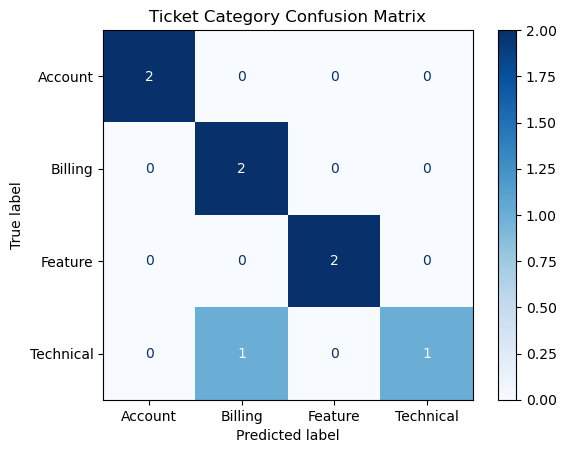

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Ticket Category Confusion Matrix")
plt.show()

In [16]:
import joblib
joblib.dump(model, "../models/ticket_model.pkl")

['../models/ticket_model.pkl']

In [17]:
model = joblib.load("../models/ticket_model.pkl")

In [18]:
def assign_priority(text):
    text = text.lower()
    if any(word in text for word in ["urgent", "error", "crash", "unable", "down"]):
        return "High"
    elif any(word in text for word in ["slow", "delay", "discrepancy"]):
        return "Medium"
    else:
        return "Low"

df["predicted_category"] = model.predict(df["clean_text"])
df["predicted_priority"] = df["text"].apply(assign_priority)

In [19]:
def assign_priority(text):
    text = text.lower()
    if any(word in text for word in ["urgent", "error", "crash", "unable", "down"]):
        return "High"
    elif any(word in text for word in ["slow", "delay", "discrepancy"]):
        return "Medium"
    else:
        return "Low"

df["predicted_category"] = model.predict(df["clean_text"])
df["predicted_priority"] = df["text"].apply(assign_priority)

In [20]:
df["predicted_category"] = model.predict(df["clean_text"])
df["predicted_priority"] = df["text"].apply(assign_priority)

print(df[["text", "predicted_category", "predicted_priority"]].head(10))

                                             text predicted_category  \
0  Unable to login to account, urgent help needed            Account   
1             Billing discrepancy in last invoice            Billing   
2                  Website is loading very slowly          Technical   
3                      Password reset not working            Account   
4            Request for new feature in dashboard            Feature   
5           Payment gateway error during checkout            Billing   
6                 App crashes when uploading file          Technical   
7         Need clarification on subscription plan            Billing   
8   Account locked after multiple failed attempts            Account   
9                       Slow response from server          Technical   

  predicted_priority  
0               High  
1             Medium  
2             Medium  
3                Low  
4                Low  
5               High  
6               High  
7                Low  


In [21]:
print(df["predicted_category"].value_counts())
print(df["predicted_priority"].value_counts())

predicted_category
Billing      12
Account      10
Technical     9
Feature       9
Name: count, dtype: int64
predicted_priority
Low       25
High      11
Medium     4
Name: count, dtype: int64


In [23]:
test_df = pd.read_csv("../data/tickets_train.csv")
test_df["clean_text"] = test_df["text"].apply(preprocess)
test_df["predicted_category"] = model.predict(test_df["clean_text"])
test_df["predicted_priority"] = test_df["text"].apply(assign_priority)